In [1]:
# Load libraries
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import NearestNeighbors

In [2]:
# Load feature and target data
iris = datasets.load_iris()
X = iris.data
y = iris.target

Attribute Information:
- sepal length in cm
- sepal width in cm
- petal length in cm
- petal width in cm

class:
    - Iris Setosa: 0 
    - Iris Versicolour: 1
    - Iris Virginica: 2

In [3]:
# Standarize features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [4]:
# Create new observation
observation_v1 = [[-0.7, 1.1, -1.1 , -1.7]]

**Support Vector Classifier**

In [5]:
# Create support vector classifier
svc_1 = LinearSVC(C=1.0)

# Train model
model_svc_1 = svc_1.fit(X_std, y)

**Train Support Vector Classifier With Weighted Classes**

In [6]:
# Create support vector classifier
svc_2 = SVC(kernel='linear', class_weight='balanced', C=1.0, random_state=0)

# Train classifier
model_svc_2 = svc_2.fit(X_std, y)

In [7]:
# Create support vector classifier object
svc_3 = SVC(kernel='linear', probability=True, random_state=0)

# Train classifier
model_svc_3 = svc_3.fit(X_std, y)

In [8]:
# Predict class of new observation
model_svc_1.predict(observation_v1), model_svc_2.predict(observation_v1), model_svc_3.predict(observation_v1)

(array([0]), array([0]), array([0]))

In [9]:
model_svc_1.intercept_, model_svc_1.coef_, model_svc_2.intercept_, model_svc_2.coef_, model_svc_3.intercept_, model_svc_3.coef_

(array([-0.76042693, -0.36450806, -2.08032629]),
 array([[-0.15805005,  0.4051476 , -0.709184  , -0.69838323],
        [-0.02429042, -0.45859075,  0.71721443, -0.69514159],
        [-0.28609122, -0.30689618,  1.75069678,  1.63216652]]),
 array([-1.47408609, -0.29523178,  3.09773099]),
 array([[-0.43882206,  0.33180056, -0.89190361, -0.92297181],
        [-0.06460811,  0.1389477 , -0.55334547, -0.55657227],
        [ 0.31017791,  0.60142345, -2.45750269, -2.44474903]]),
 array([-1.47408609, -0.29523178,  3.09773099]),
 array([[-0.43882206,  0.33180056, -0.89190361, -0.92297181],
        [-0.06460811,  0.1389477 , -0.55334547, -0.55657227],
        [ 0.31017791,  0.60142345, -2.45750269, -2.44474903]]))

**Plot The Support Vector Classifiers Hyperplane**

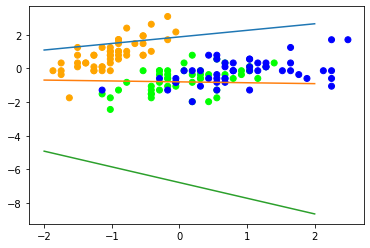

In [10]:
# Plot data points and color using their class
color = ['orange' if c == 0 else 'lime' if c == 1 else 'blue' for c in y]
plt.scatter(X_std[:,0], X_std[:,1], c=color)

# Create the hyperplane

line = np.linspace(-2, 2)

for coef, intercept in zip(svc_1.coef_, svc_1.intercept_):  
    plt.plot(line, - (line * coef[0] + intercept) / coef[1])    
plt.show()  

In [12]:
model_svc_2.support_vectors_

array([[-0.90068117,  0.55861082, -1.16971425, -0.92054774],
       [-1.62768839, -1.74335684, -1.39706395, -1.18381211],
       [ 1.2803405 ,  0.09821729,  0.64908342,  0.3957741 ],
       [ 0.79566902, -0.59237301,  0.47857113,  0.3957741 ],
       [ 0.55333328,  0.55861082,  0.53540856,  0.52740629],
       [-1.14301691, -1.51316008, -0.26031542, -0.26238682],
       [-0.29484182, -0.13197948,  0.42173371,  0.3957741 ],
       [ 0.4321654 , -1.97355361,  0.42173371,  0.3957741 ],
       [ 0.06866179,  0.32841405,  0.59224599,  0.79067065],
       [ 0.55333328, -1.28296331,  0.64908342,  0.3957741 ],
       [ 1.15917263, -0.59237301,  0.59224599,  0.26414192],
       [ 1.03800476, -0.13197948,  0.70592084,  0.65903847],
       [ 0.18982966, -0.36217625,  0.42173371,  0.3957741 ],
       [ 0.18982966, -0.82256978,  0.76275827,  0.52740629],
       [-0.53717756, -0.13197948,  0.42173371,  0.3957741 ],
       [ 0.55333328, -1.74335684,  0.36489628,  0.13250973],
       [-0.90068117, -1.

In [13]:
model_svc_2.support_

array([ 23,  41,  52,  54,  56,  57,  66,  68,  70,  72,  76,  77,  78,
        83,  84,  87,  98, 106, 110, 119, 123, 126, 127, 129, 133, 134,
       137, 138, 149])

In [14]:
model_svc_2.n_support_

array([ 2, 15, 12])

**Find Each Observation’s Two Nearest Neighbors**

In [15]:
# Find three nearest neighbors based on euclidean distance (including itself)
nn_euclidean = NearestNeighbors(n_neighbors=3, metric='euclidean').fit(X)

# List of lists indicating each observation's 3 nearest neighors
nearest_neighbors_with_self = nn_euclidean.kneighbors_graph(X).toarray()

# Remove 1's marking an observation is nearest to itself 
for i, x in enumerate(nearest_neighbors_with_self):
    x[i] = 0

In [16]:
# View first observation's two nearest neighbors
nearest_neighbors_with_self[0]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])